In [ ]:
import os, shutil, pathlib

YOU CAN DOWNLOAD dogs_cats from here https://www.kaggle.com/c/dogs-vs-cats

In [ ]:
original_path = pathlib.Path("../dataset/dogs_cats/train/train") # place a right path for your dataset 
new_base = pathlib.Path("cat_dogs_small")

In [ ]:
def make_subset(subset_name, start, end):
    for category in ("cat", "dog"):
        dir = new_base / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start, end)]
        for fname in fnames:
            shutil.copyfile(src = original_path / fname, dst = dir/fname)


In [ ]:
make_subset("train", start = 0, end = 1000)
make_subset("validation", start = 100, end = 1500)
make_subset("test", start = 1500, end = 2500)

In [1]:
import keras
from keras import layers


In [11]:
inputs = keras.Input(shape=(180, 180, 3)) 
x = layers.Rescaling(1./255)(inputs) 
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)



In [12]:
model = keras.Model(inputs = inputs, outputs = outputs)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                      

In [13]:
model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

DATA PREPROCESSING

In [5]:
from keras.utils import image_dataset_from_directory as idfd

In [6]:

train_dataset = idfd(directory="C:/Users/Asilk/Desktop/Journey/dataset/cat_dogs_small/train/", batch_size=32, image_size=(180, 180))

test_dataset = idfd(directory="C:/Users/Asilk/Desktop/Journey/dataset/cat_dogs_small/test/", batch_size=32, image_size=(180, 180))

val_dataset = idfd(directory="C:/Users/Asilk/Desktop/Journey/dataset/cat_dogs_small/validation/", batch_size=32, image_size=(180, 180))

Found 2000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
Found 2800 files belonging to 2 classes.


In [7]:
for data_batch ,labels_batch in train_dataset:
    print(data_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [8]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='convnet_from_scratch.keras',
        save_best_only=True,
        monitor = 'val_loss'
    )
]

In [14]:
history = model.fit(x=train_dataset, epochs =20, validation_data= val_dataset, callbacks = callbacks)

Epoch 1/20




63/63 [==============================] - 34s 534ms/step - loss: 0.6994 - accuracy: 0.5005 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 2/20
63/63 [==============================] - 34s 539ms/step - loss: 0.6940 - accuracy: 0.5345 - val_loss: 0.6907 - val_accuracy: 0.5443
Epoch 3/20
63/63 [==============================] - 33s 527ms/step - loss: 0.6899 - accuracy: 0.5570 - val_loss: 0.6656 - val_accuracy: 0.6075
Epoch 4/20
63/63 [==============================] - 32s 516ms/step - loss: 0.6548 - accuracy: 0.6150 - val_loss: 0.6705 - val_accuracy: 0.6193
Epoch 5/20
63/63 [==============================] - 30s 483ms/step - loss: 0.6116 - accuracy: 0.6575 - val_loss: 0.8330 - val_accuracy: 0.5843
Epoch 6/20
63/63 [==============================] - 32s 501ms/step - loss: 0.5864 - accuracy: 0.6760 - val_loss: 0.6433 - val_accuracy: 0.6196
Epoch 7/20
63/63 [==============================] - 30s 480ms/step - loss: 0.5660 - accuracy: 0.6970 - val_loss: 0.5364 - val_accuracy: 0.7229
Epoch 8/

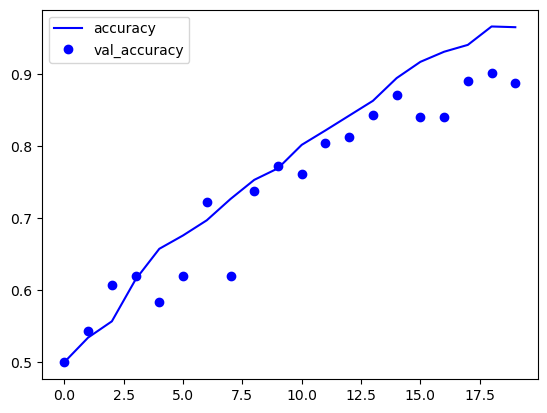

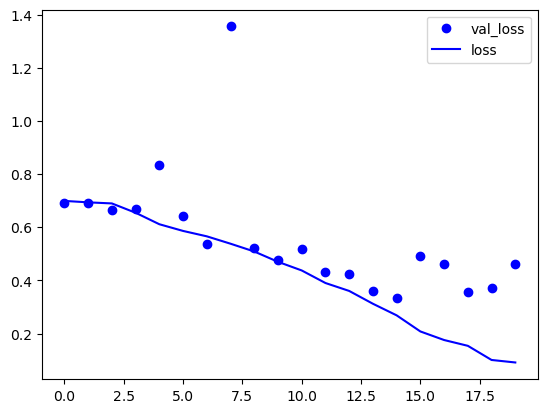

In [21]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

val_loss = history.history['val_loss']
loss= history.history['loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'b', label = 'accuracy')
plt.plot(epochs, val_acc, 'bo', label = 'val_accuracy')

plt.legend()
plt.figure()

plt.plot(epochs, val_loss, 'bo', label = 'val_loss')
plt.plot(epochs, loss, 'b', label= 'loss')
plt.legend()





